# Support Vector Machines (SVM)
##  The Concept: The Widest Street 

Imagine you have red balls and blue balls on a table. You want to use a stick to separate them.
*   **Decision Tree:** Cuts the table into rectangular grid regions.
*   **SVM:** Tries to find a straight line (stick) that separates the balls but also keeps the **maximum distance** from the closest balls of each color.
### Key Terms:
1.  **Hyperplane:** The decision boundary (the stick). In 2D it's a line, in 3D it's a plane, in 64D (our images) it's a hyperplane.
2.  **Margin:** The distance between the hyperplane and the nearest data points. SVM maximizes this margin.
3.  **Support Vectors:** The specific data points that are closest to the line. These are the "hardest" cases to classify. The model *only* cares about these points; the rest don't matter for defining the boundary.

---
## The Kernel Trick: Handling Non-Linearity 

What if the red balls are in the *center* and blue balls are surrounding them in a circle? You can't separate them with a straight stick.

**The Solution:** You lift the red balls up (add a 3rd dimension). Now you can slide a flat sheet between the red and blue balls.
When you project this back down to 2D, the boundary looks like a circle.

This mathematical projection is called a **Kernel**.
Common Kernels:
*   **Linear:** Straight lines.
*   **Poly:** Polynomial curves.
*   **RBF (Radial Basis Function):** Creates complex, circular/organic boundaries (Most popular).

---

## Implementation: SVM with Grid Search 

SVM is very sensitive to two parameters:
1.  **C (Regularization):**
    *   High C: Strict. Tries not to miss any training point (Risk of Overfitting).
    *   Low C: Smooth. Accepts some errors to have a wider margin (Better Generalization).
2.  **Gamma ($\gamma$):**
    *   High Gamma: Points must be very close to be considered similar. Creates islands around data points.
    *   Low Gamma: Points far away are still considered similar.

Data shape: (1797, 64)
Training SVM with Grid Search... (This might take a moment)
Best Parameters Found:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98     

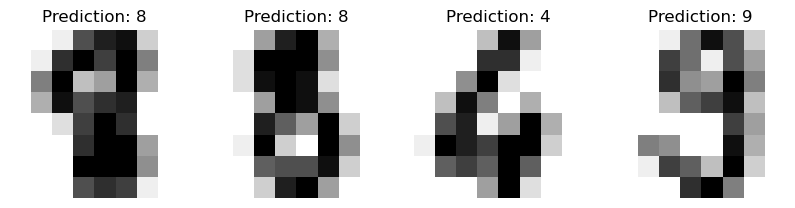

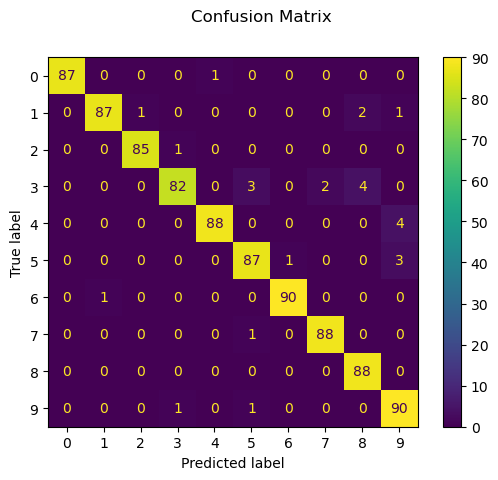

In [12]:
# step 1 import lib
import matplotlib.pyplot as plt
from sklearn import datasets , svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
# step2 load data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# step 3 preprocess data
# 3.1 flatten the images
n_samples = len(digits.images)
print(f"Data shape: {X.shape}")

# step 4 split data 50% train 50%test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)


# step 5 Define Model
param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 ]

# Create a classifier object with the classifier and parameter candidates
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, cv=5) # cv=5 means 5-fold Cross-Validation

print("Training SVM with Grid Search... (This might take a moment)")
clf.fit(X_train, y_train)
print("Best Parameters Found:")
print(clf.best_params_)


# Predict using the best model found
predicted = clf.predict(X_test)

print(
f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, predicted)}\n"
)

# step 6 Visualisation prediction
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# step 7 confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
